# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [217]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

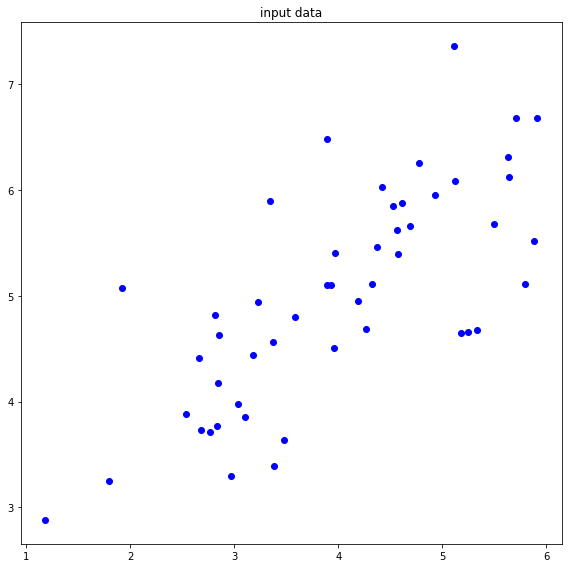

In [43]:
def plot_data(feature):
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    plt.tight_layout()
    plt.show()
plot_data(feature)

## Normalization (Z-scoring)

mean of x =  3.9892652
mean of y =  5.0028060000000005
std of x =  1.161260585149156
std of y =  1.0131222834742113


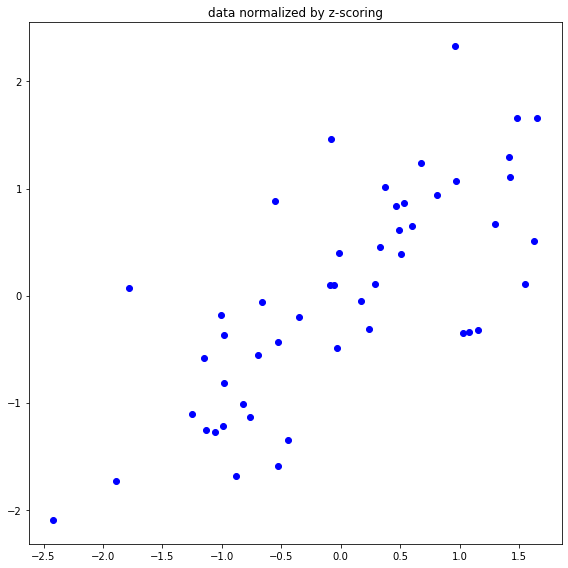

In [218]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
mean_x = np.mean(x)
mean_y = np.mean(y)
print("mean of x = ", mean_x)
print("mean of y = ", mean_y)
std_x = np.std(x)
std_y = np.std(y)
print('std of x = ', std_x)
print('std of y = ', std_y)
x_Z = (x - mean_x) / std_x
y_Z = (y - mean_y) / std_y
plt.scatter(x_Z, y_Z, c = 'blue')
plt.tight_layout()
plt.show()

feature = np.stack((x_Z, y_Z), axis = 1)

## compute covariance matrix

In [221]:
def compute_covariance(feature):
    Sigma = (1/len(feature))*feature.T@feature
    
    return Sigma

## compute principal directions

In [131]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    
    return S, U

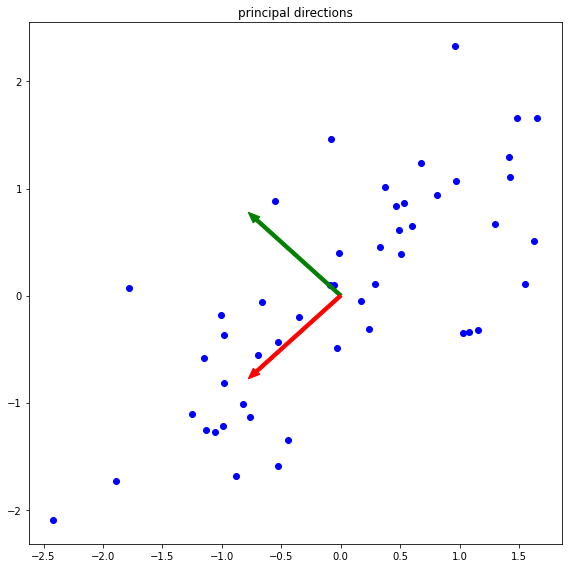

In [316]:
def plot_principal_directions(feature):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)

    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    plt.arrow(0, 0, U[0, 0], U[1, 0], color = 'green', head_width = 0.08, head_length = 0.1, width = 0.03)
    plt.arrow(0, 0, U[0, 1], U[1, 1], color = 'red',  head_width = 0.08, head_length = 0.1, width = 0.03)

    plt.tight_layout()
    plt.show()
    
plot_principal_directions(feature)

## first principal axis

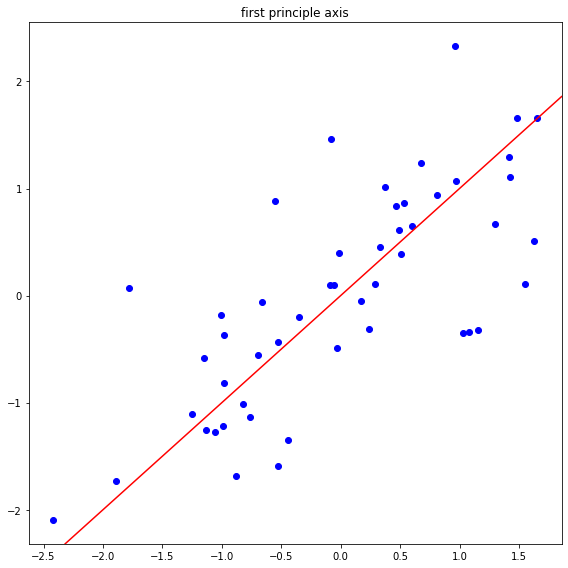

In [318]:
def plot_first(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)    
    plt.axline([0, 0], [U[0, 1], U[1, 1]], color = 'red')
    plt.tight_layout()
    plt.show()
    
plot_first(feature)

## second principal axis

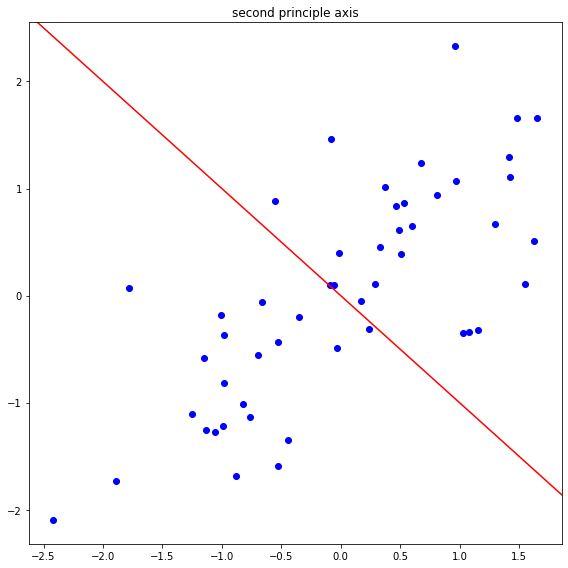

In [320]:
def plot_second(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)
    plt.axline([0, 0], [U[0, 0], U[1, 0]], color = 'red')
    plt.tight_layout()
    plt.show()
    
plot_second(feature)

## compute the projection of point onto the line

In [228]:
def compute_projection_onto_line(feature, vector):
    projection = vector.T @ feature.T
    
    return projection

## projcet to the first principal axis

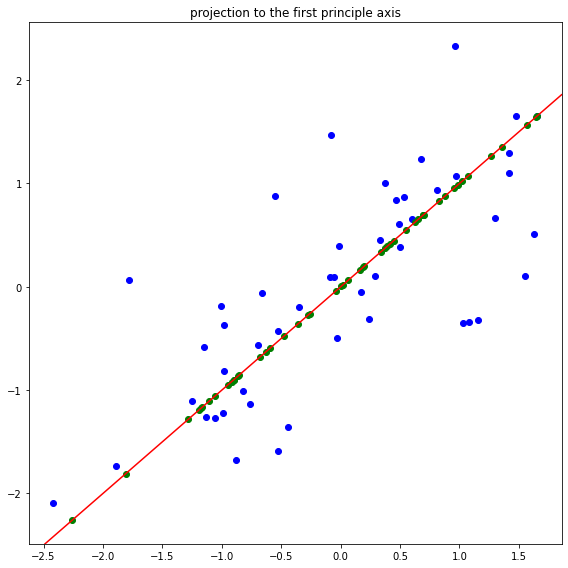

In [322]:
def proj_first(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)
    plt.axline([0, 0], [U[0, 1], U[1, 1]], color = 'red')

    proj = compute_projection_onto_line(feature, U[:, 1][:, np.newaxis])
    proj = U[:, 1][:, np.newaxis]@proj
    plt.scatter(proj[0, :], proj[1, :], color = 'green')

    plt.tight_layout()
    plt.show()
    
proj_first(feature)

## projcet to the second principal axis

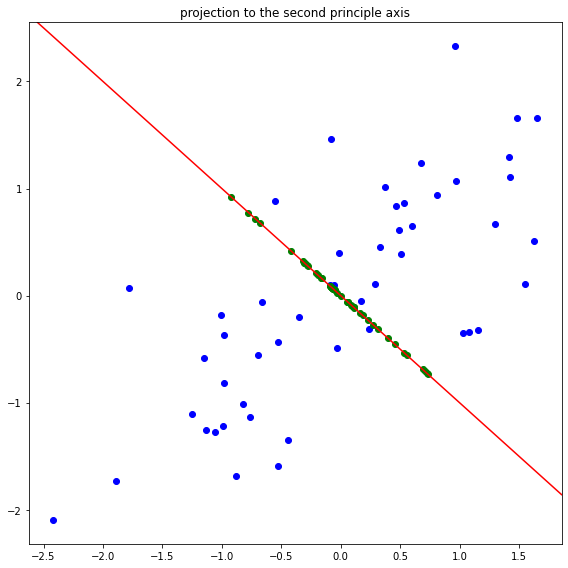

In [324]:
def proj_second(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)
    plt.axline([0, 0], [U[0, 0], U[1, 0]], color = 'red')

    proj = compute_projection_onto_line(feature, U[:, 0][:, np.newaxis])
    proj = U[:, 0][:, np.newaxis]@proj
    plt.scatter(proj[0, :], proj[1, :], color = 'green')
    plt.tight_layout()
    plt.show()
    
proj_second(feature)

## connect original data to the projection onto the first principal axis

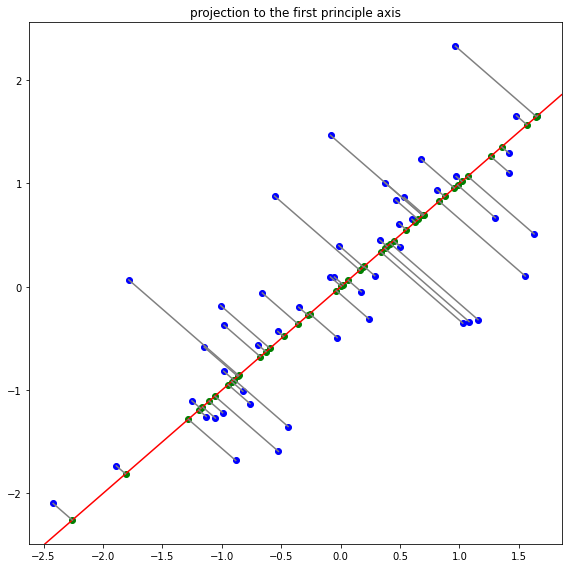

In [326]:
def connect_first(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)
    plt.axline([0, 0], [U[0, 1], U[1, 1]], color = 'red')

    proj = compute_projection_onto_line(feature, U[:, 1][:, np.newaxis])
    proj = U[:, 1][:, np.newaxis]@proj
    plt.scatter(proj[0, :], proj[1, :], color = 'green')

    for i in range(len(feature)):
        connect_x = (feature[:, 0][i], proj[0, :][i])
        connect_y = (feature[:, 1][i], proj[1, :][i])
        plt.plot(connect_x, connect_y, color = 'grey')


    plt.tight_layout()
    plt.show()
    
connect_first(feature)

## connect original data to the projection onto the second principal axis

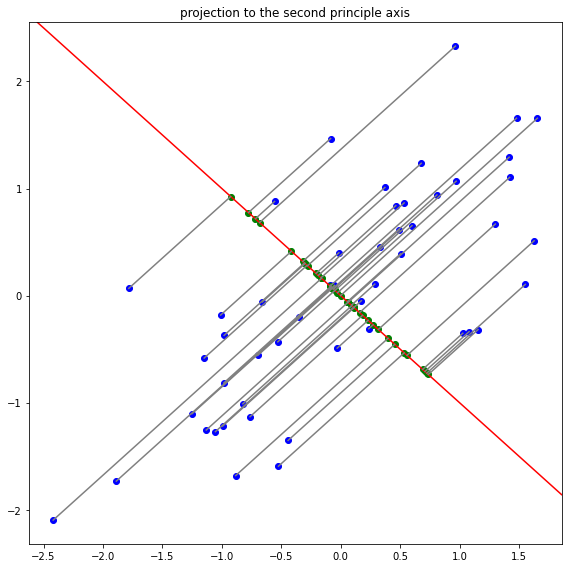

In [327]:
def connect_second(feature):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    plt.scatter(feature[:, 0], feature[:, 1], c = 'blue')
    Sigma = compute_covariance(feature)
    S, U = compute_eigen(Sigma)
    plt.axline([0, 0], [U[0, 0], U[1, 0]], color = 'red')

    proj = compute_projection_onto_line(feature, U[:, 0][:, np.newaxis])
    proj = U[:, 0][:, np.newaxis]@proj
    plt.scatter(proj[0, :], proj[1, :], color = 'green')

    for i in range(len(feature)):
        connect_x = (feature[:, 0][i], proj[0, :][i])
        connect_y = (feature[:, 1][i], proj[1, :][i])
        plt.plot(connect_x, connect_y, color = 'grey')

    plt.tight_layout()
    plt.show()
    
connect_second(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

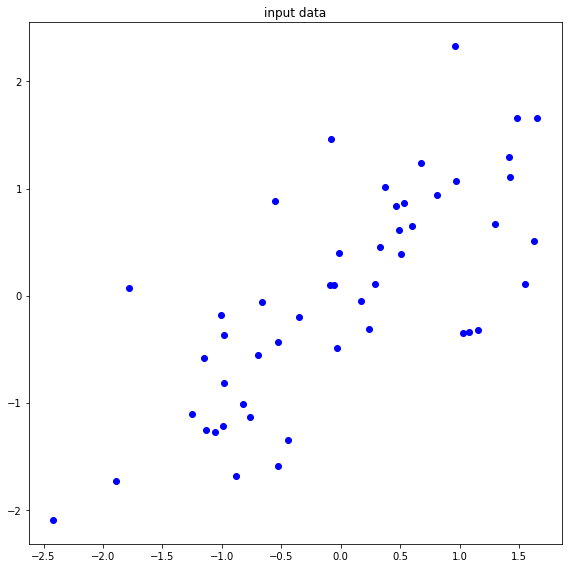

In [312]:
plot_data(feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

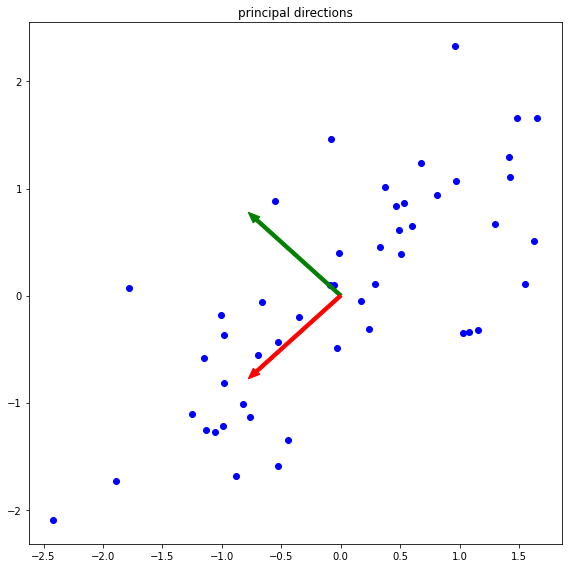

In [317]:
plot_principal_directions(feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

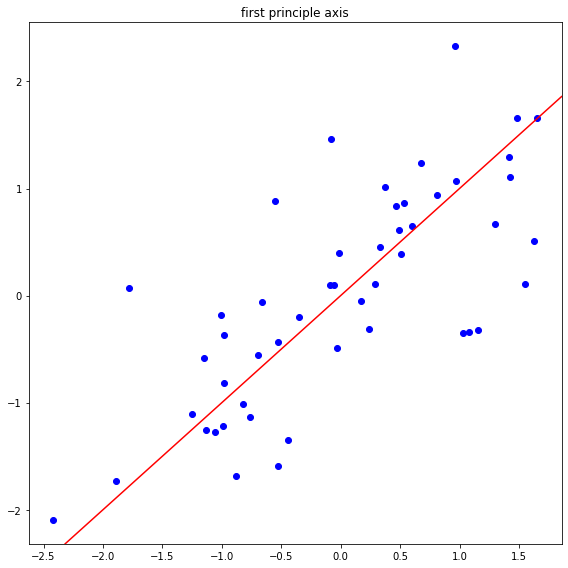

In [319]:
plot_first(feature)

***

### 4. plot the second principal axis in red on the normalized data in blue

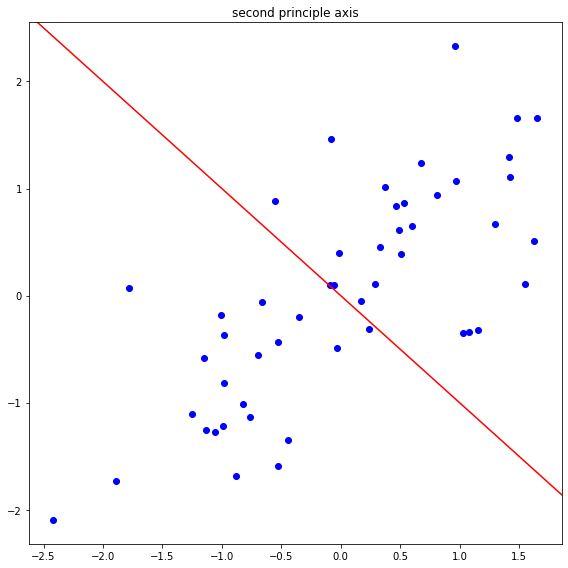

In [321]:
plot_second(feature)

***

### 5. plot the projection of data in green onto the first principal axis in red

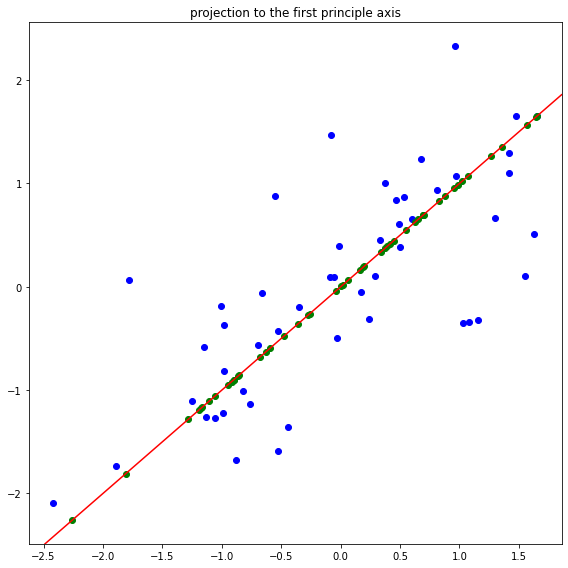

In [323]:
proj_first(feature)

***

### 6. plot the projection of data in green onto the second principal axis in red

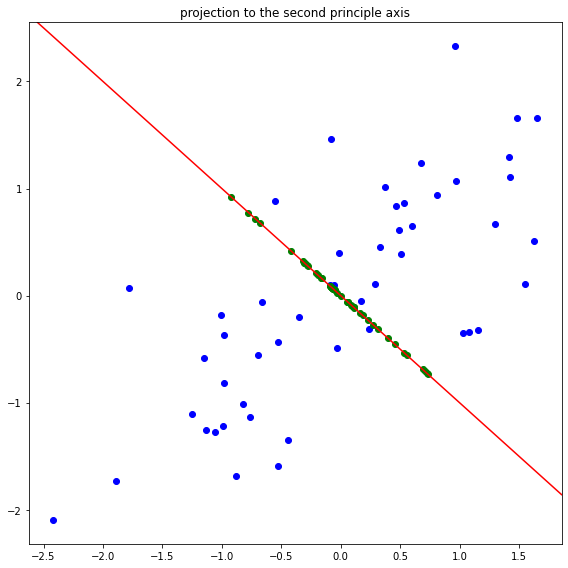

In [325]:
proj_second(feature)

***

### 7. plot the projection line in grey onto the first principal axis

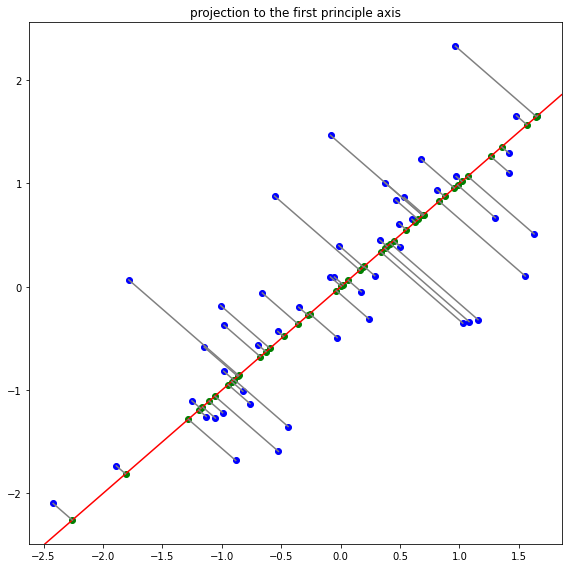

In [328]:
connect_first(feature)

***

### 8. plot the projection line in grey onto the second principal axis

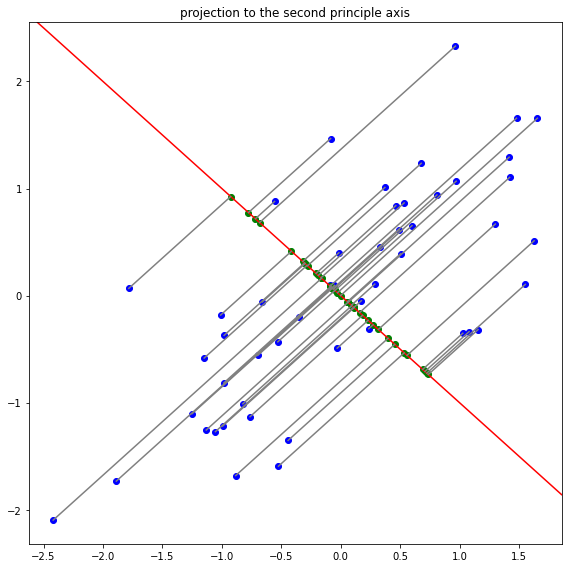

In [329]:
connect_second(feature)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***